In [2471]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression,  Lasso, Ridge,ElasticNet
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.decomposition import PCA
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.tree import plot_tree
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import time

In [2472]:
df_test = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/Data Science II/Assignment 1/test.csv', ";")
df_train = pd.read_csv('/Users/mikeredshaw/Documents/Schulich MBAN/Data Science II/Assignment 1/train.csv', ";")

In [2473]:
df_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2474]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2475]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [2476]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [2477]:
df_train.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [2478]:
df_train.drop_duplicates(inplace = True)

In [2479]:
df_train.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [2480]:
df_test.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [2481]:
df_test.drop_duplicates(inplace= True)

In [2482]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [2483]:
df_test.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [2484]:
df_train['y'].unique()

array(['no', 'yes'], dtype=object)

In [2485]:
print(df_test['y'].value_counts())
print(df_train['y'].value_counts())

no     4000
yes     521
Name: y, dtype: int64
no     39922
yes     5289
Name: y, dtype: int64


In [2486]:
df_test['y'] = df_test['y'].map({'yes': 1, 'no': 0})
df_train['y'] = df_train['y'].map({'yes': 1, 'no': 0})

In [2487]:
df_test['y'].unique()

array([0, 1])

In [2488]:
print(df_test['y'].value_counts())
print(df_train['y'].value_counts())

0    4000
1     521
Name: y, dtype: int64
0    39922
1     5289
Name: y, dtype: int64


In [2489]:
(df_train == 'unknown').sum().sum()

52124

In [2490]:
unknown_counts_train = (df_train == 'unknown').sum()
columns_with_unknown_train = unknown_counts_train[unknown_counts_train > 0]
proportion_with_unknown_train = unknown_counts_train[unknown_counts_train > 0] / len(df_train)
print(columns_with_unknown_train,  proportion_with_unknown_train*100)


job            288
education     1857
contact      13020
poutcome     36959
dtype: int64 job           0.637013
education     4.107407
contact      28.798301
poutcome     81.747805
dtype: float64


In [2491]:
print('df_train contact value counts before imputation:\n', df_train['contact'].value_counts())
print('df_train contact value counts before imputation:\n', df_test['contact'].value_counts())

df_train contact value counts before imputation:
 cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
df_train contact value counts before imputation:
 cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64


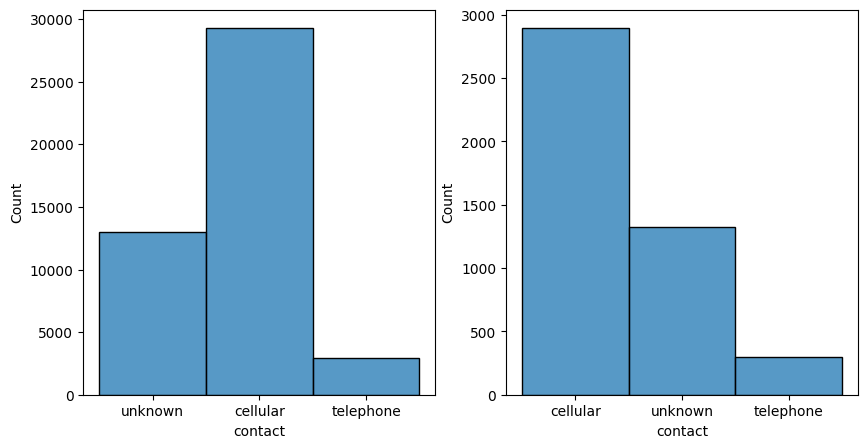

In [2492]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(df_train['contact'], ax=ax1)
sns.histplot(df_test['contact'], ax=ax2)
plt.show()

In [2493]:
unknown_counts_test = (df_test == 'unknown').sum()
columns_with_unknown_test = unknown_counts_test[unknown_counts_test > 0]
proportion_with_unknown_test = unknown_counts_test[unknown_counts_test > 0] / len(df_test)
print(columns_with_unknown_test,  proportion_with_unknown_test*100)

job            38
education     187
contact      1324
poutcome     3705
dtype: int64 job           0.840522
education     4.136253
contact      29.285556
poutcome     81.950896
dtype: float64


There are a lot of values 'unknown'. in columns job and education, the amount is small enough where I feel I could simply impute the data with the mode values of the column. For contact and poutcome, the proportion of 'unknown' is much higher and a different approach may be needed.

In [2494]:
df_train['job'].replace('unknown', df_train['job'].mode()[0], inplace=True)
df_train['education'].replace('unknown', df_train['education'].mode()[0], inplace=True)


In [2495]:
df_test['job'].replace('unknown', df_test['job'].mode()[0], inplace=True)
df_test['education'].replace('unknown', df_test['education'].mode()[0], inplace=True)


For the contact column, I'm going to look to impute the unknown values using a classification model. I'm doing this because there's 30% of the values that are 'unknown' and imputing with mode would likely cause too much bias, so I'm taking this approach instead.

In [2496]:
df_train.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [2497]:
contact_train = df_train[df_train['contact'] != 'unknown']
contact_predict = df_train[df_train['contact'] == 'unknown']

X_train_actual, X_valid, y_train_actual, y_valid = train_test_split(
    contact_train.drop('contact', axis=1),
    contact_train['contact'],
    test_size=0.3,
    random_state=42
)

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train_actual)

X_valid_encoded = encoder.transform(X_valid)
X_predict_encoded = encoder.transform(contact_predict.drop('contact', axis=1))

In [2498]:
dt = DecisionTreeClassifier()
dt.fit(X_train_encoded, y_train_actual)

y_valid_pred = dt.predict(X_valid_encoded)

accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Accuracy of imputation on the validation set: {accuracy:.2f}")

predicted_values = dt.predict(X_predict_encoded)

df_train.loc[df_train['contact'] == 'unknown', 'contact'] = predicted_values


Accuracy of imputation on the validation set: 0.88


In [2499]:
contact_train_2 = df_test[df_test['contact'] != 'unknown']
contact_predict_2 = df_test[df_test['contact'] == 'unknown']

X_train_actual_2, X_valid_2, y_train_actual_2, y_valid_2 = train_test_split(
    contact_train_2.drop('contact', axis=1),
    contact_train_2['contact'],
    test_size=0.3,
    random_state=42
)

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded_2 = encoder.fit_transform(X_train_actual_2)

X_valid_encoded_2 = encoder.transform(X_valid_2)
X_predict_encoded_2 = encoder.transform(contact_predict_2.drop('contact', axis=1))

In [2500]:
dt = DecisionTreeClassifier()
dt.fit(X_train_encoded_2, y_train_actual_2)

y_valid_pred_2 = dt.predict(X_valid_encoded_2)

accuracy = accuracy_score(y_valid_2, y_valid_pred_2)
print(f"Accuracy of imputation on the validation set: {accuracy:.2f}")

predicted_values_2 = dt.predict(X_predict_encoded_2)

df_test.loc[df_test['contact'] == 'unknown', 'contact'] = predicted_values_2

Accuracy of imputation on the validation set: 0.87


In [2501]:
print('df_train contact value counts after imputation:\n', df_train['contact'].value_counts())
print('df_train contact value counts after imputation:\n', df_test['contact'].value_counts())

df_train contact value counts after imputation:
 cellular     41548
telephone     3663
Name: contact, dtype: int64
df_train contact value counts after imputation:
 cellular     4146
telephone     375
Name: contact, dtype: int64


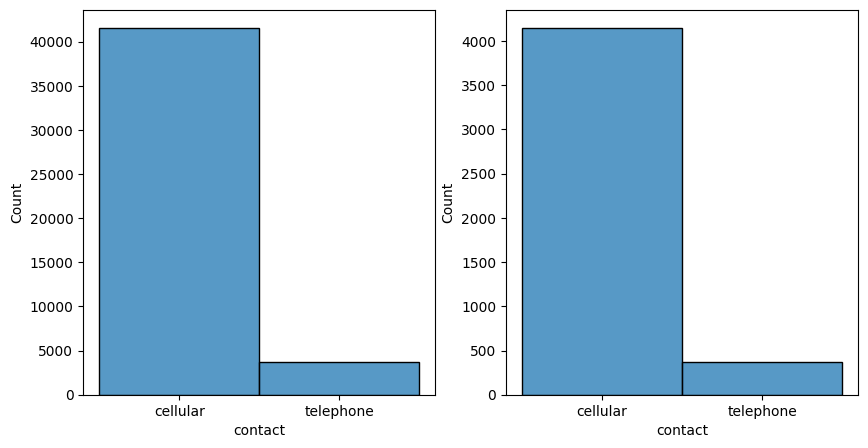

In [2502]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(df_train['contact'], ax=ax1)
sns.histplot(df_test['contact'], ax=ax2)
plt.show()

By imputing using the random forest model to help predict what the 'unknown' values likely would be, we've been able to fill those unknown values without having to drop them. By keeping aside a portion of known values to test the accuracy of the RandomForest imputation, we can see that for both the df_train and df_test datasets, the model was nearly 90% accurate in making it's prediction on how to categorize. Since this is simply for imputation and filling unknown values, 90% accuracy is strong enough in my opinion to accept this imputation method and continue on.

In [2503]:
df_train['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Since there is so many unknown values in the poutcome, I'm going to continue on without touching this, as there could be information in the fact that an outcome is unknown, which might still help the model. However, I'm going to create an additional binary column that is a 1 if the poutcome was labelled a success, and a 0 otherwise. This effectively groups all the other, failure, and unknown values into one.

In [2504]:
df_train['poutcome_success'] = np.where(df_train['poutcome'] == 'success', 1, 0)
df_test['poutcome_success'] = np.where(df_test['poutcome'] == 'success', 1, 0)


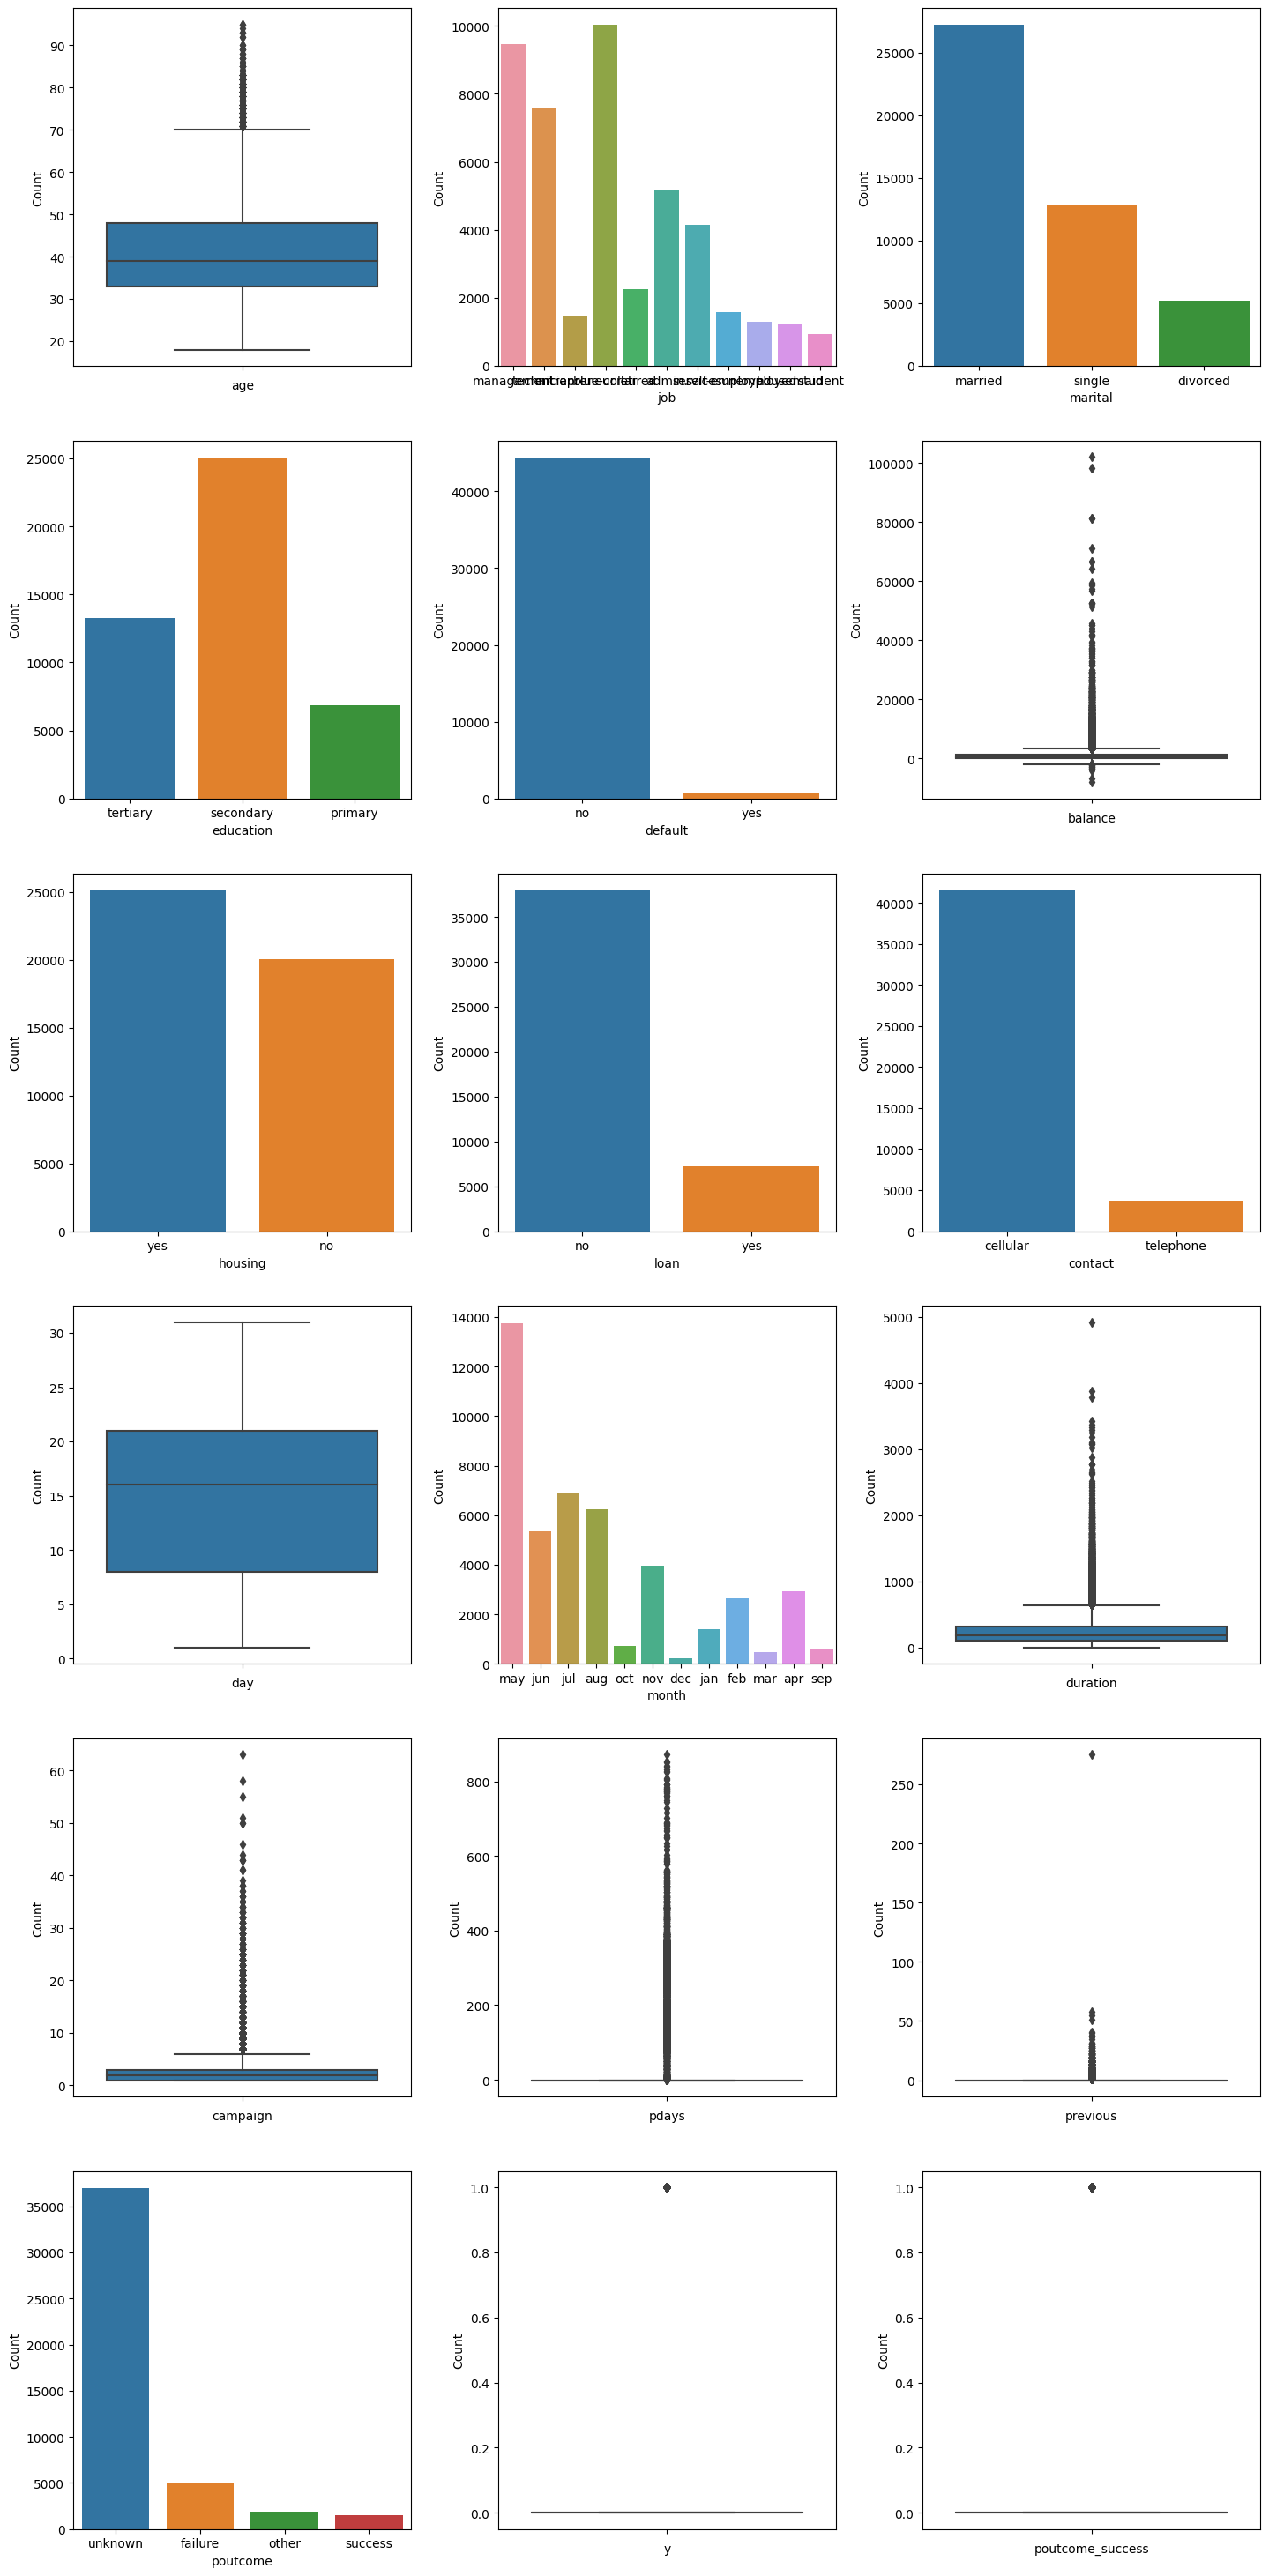

In [2505]:
columns = df_train.columns
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=4.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]

    if np.issubdtype(df_train[column].dtype, np.number):
        sns.boxplot(data=df_train, y=column, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
    else:
        sns.countplot(data=df_train, x=column, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

for j in range(i+1, num_rows*num_cols):
    axes.flatten()[j].set_visible(False)

plt.show()

For most numerical data, there are many values considered outliers. However, since this is a classification problem, we have models available that are able to handle outliers quite well. The only outlier I think I will remove is the previous column value above 250, as it is one outlier value that is extremely far from the mean of the data.

In [2506]:
df_train[df_train['previous']> 250]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,poutcome_success
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,0,0


In [2507]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               45211 non-null  int64 
 1   job               45211 non-null  object
 2   marital           45211 non-null  object
 3   education         45211 non-null  object
 4   default           45211 non-null  object
 5   balance           45211 non-null  int64 
 6   housing           45211 non-null  object
 7   loan              45211 non-null  object
 8   contact           45211 non-null  object
 9   day               45211 non-null  int64 
 10  month             45211 non-null  object
 11  duration          45211 non-null  int64 
 12  campaign          45211 non-null  int64 
 13  pdays             45211 non-null  int64 
 14  previous          45211 non-null  int64 
 15  poutcome          45211 non-null  object
 16  y                 45211 non-null  int64 
 17  poutcome_suc

In [2508]:
df_train = df_train[df_train['previous'] <= 250]

In [2509]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               45210 non-null  int64 
 1   job               45210 non-null  object
 2   marital           45210 non-null  object
 3   education         45210 non-null  object
 4   default           45210 non-null  object
 5   balance           45210 non-null  int64 
 6   housing           45210 non-null  object
 7   loan              45210 non-null  object
 8   contact           45210 non-null  object
 9   day               45210 non-null  int64 
 10  month             45210 non-null  object
 11  duration          45210 non-null  int64 
 12  campaign          45210 non-null  int64 
 13  pdays             45210 non-null  int64 
 14  previous          45210 non-null  int64 
 15  poutcome          45210 non-null  object
 16  y                 45210 non-null  int64 
 17  poutcome_suc

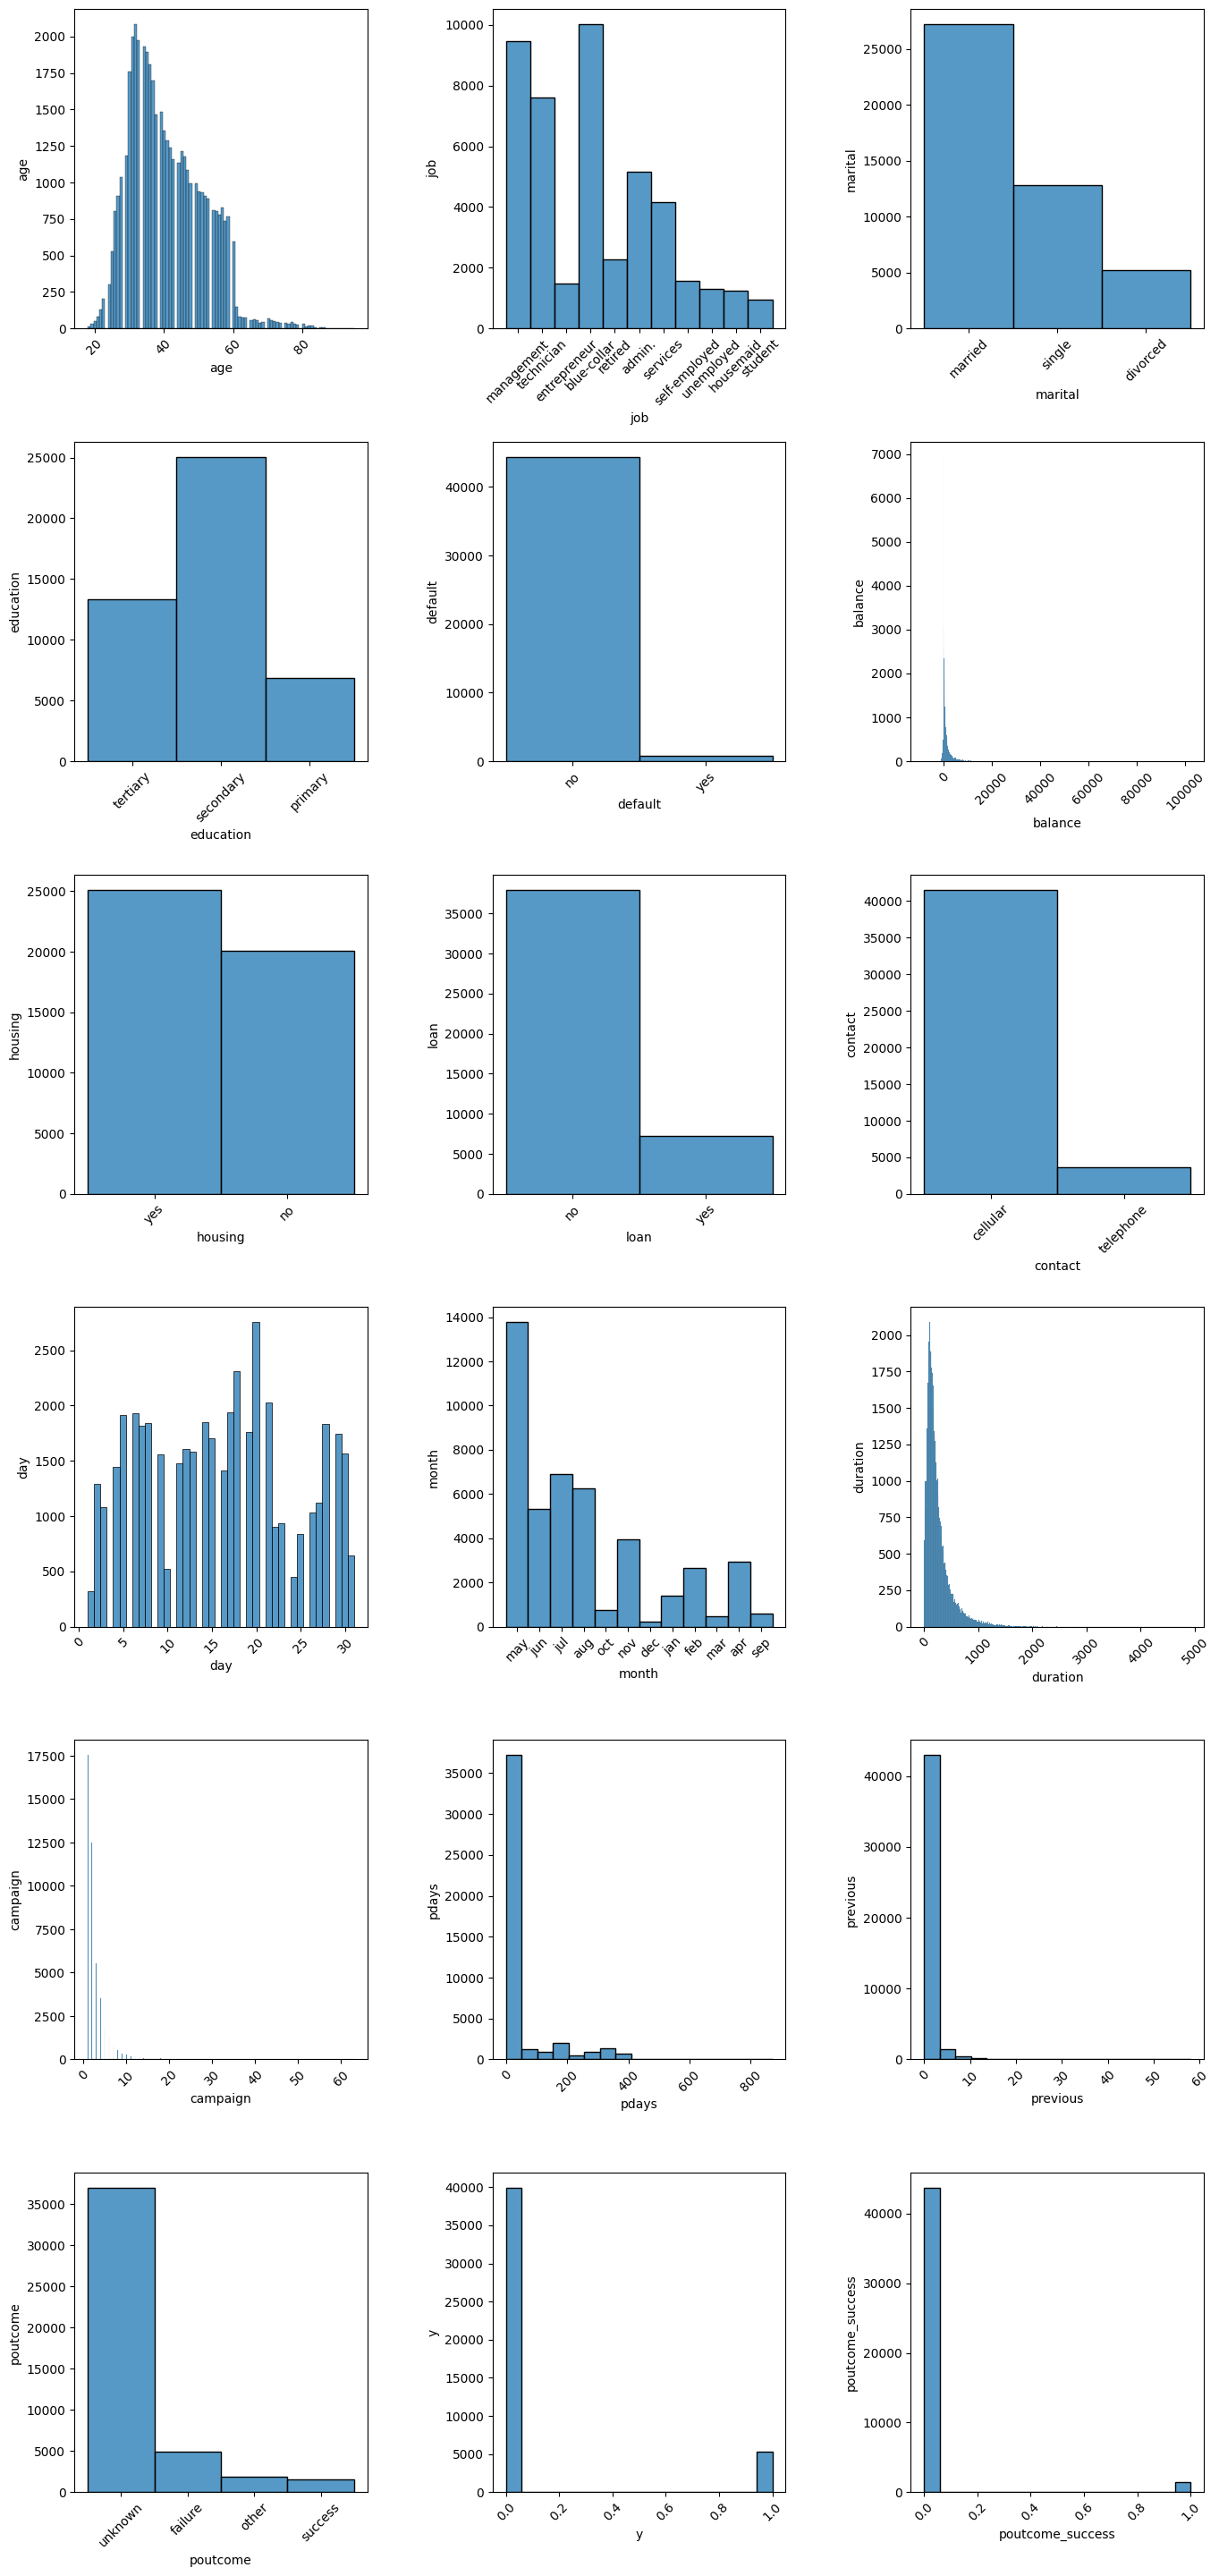

In [2510]:
columns = df_train.columns
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df_train, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)
plt.show()

Now I'm going to check for any issues in the test dataset

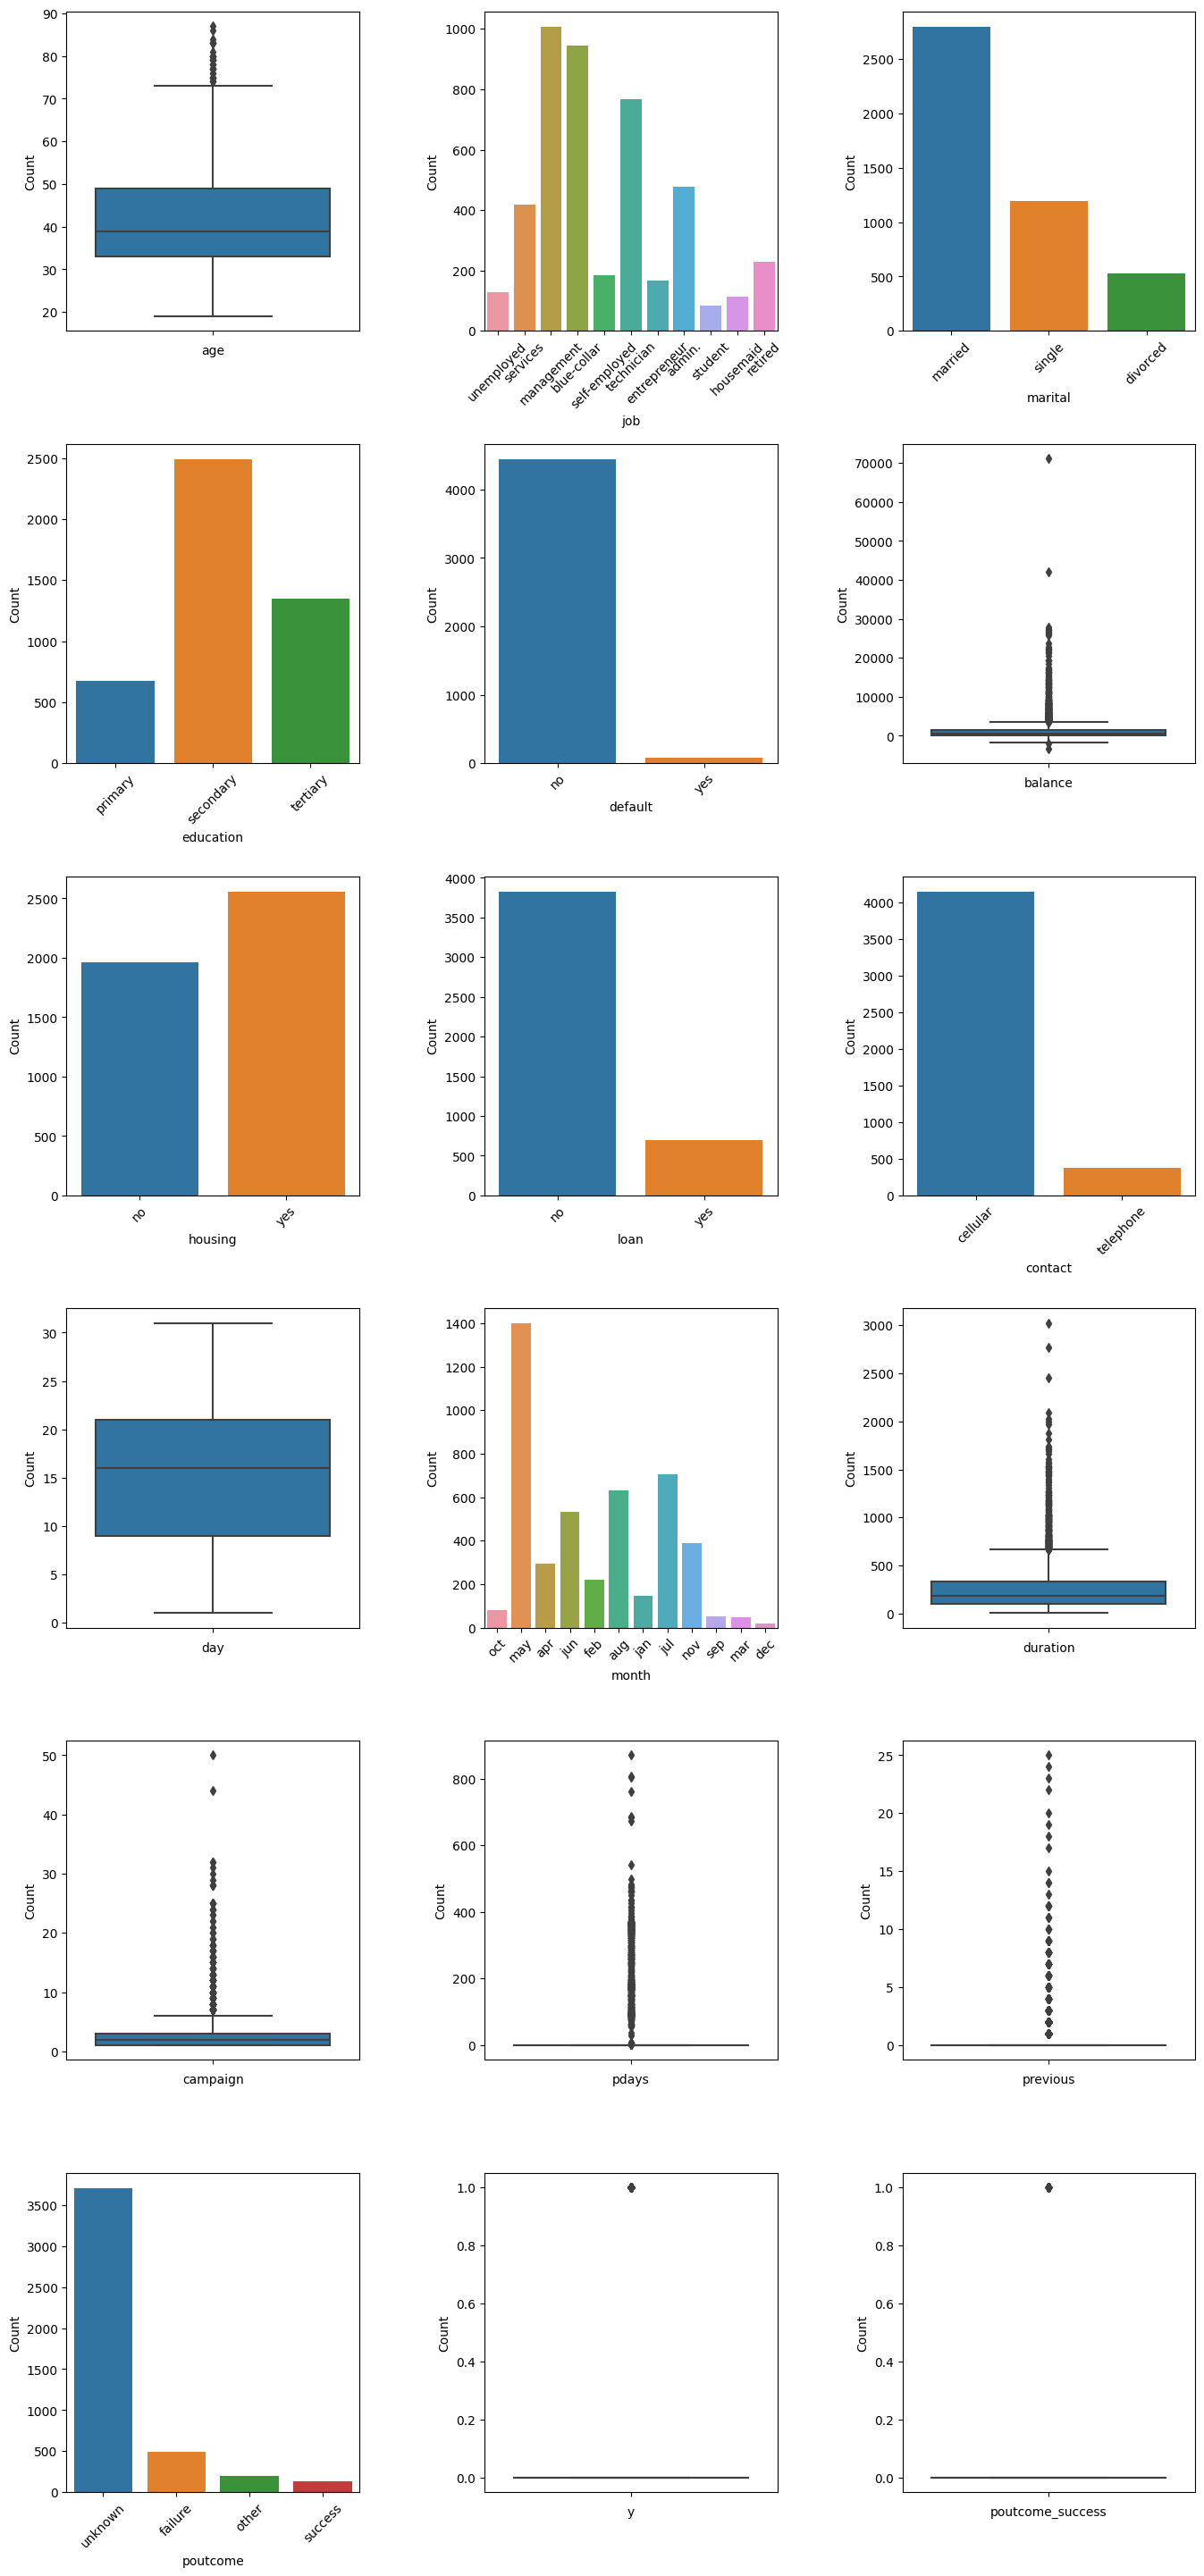

In [2511]:
columns = df_test.columns
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]

    if np.issubdtype(df_test[column].dtype, np.number):
        sns.boxplot(data=df_test, y=column, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
    else:
        sns.countplot(data=df_test, x=column, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)

for j in range(i+1, num_rows*num_cols):
    axes.flatten()[j].set_visible(False)

plt.show()

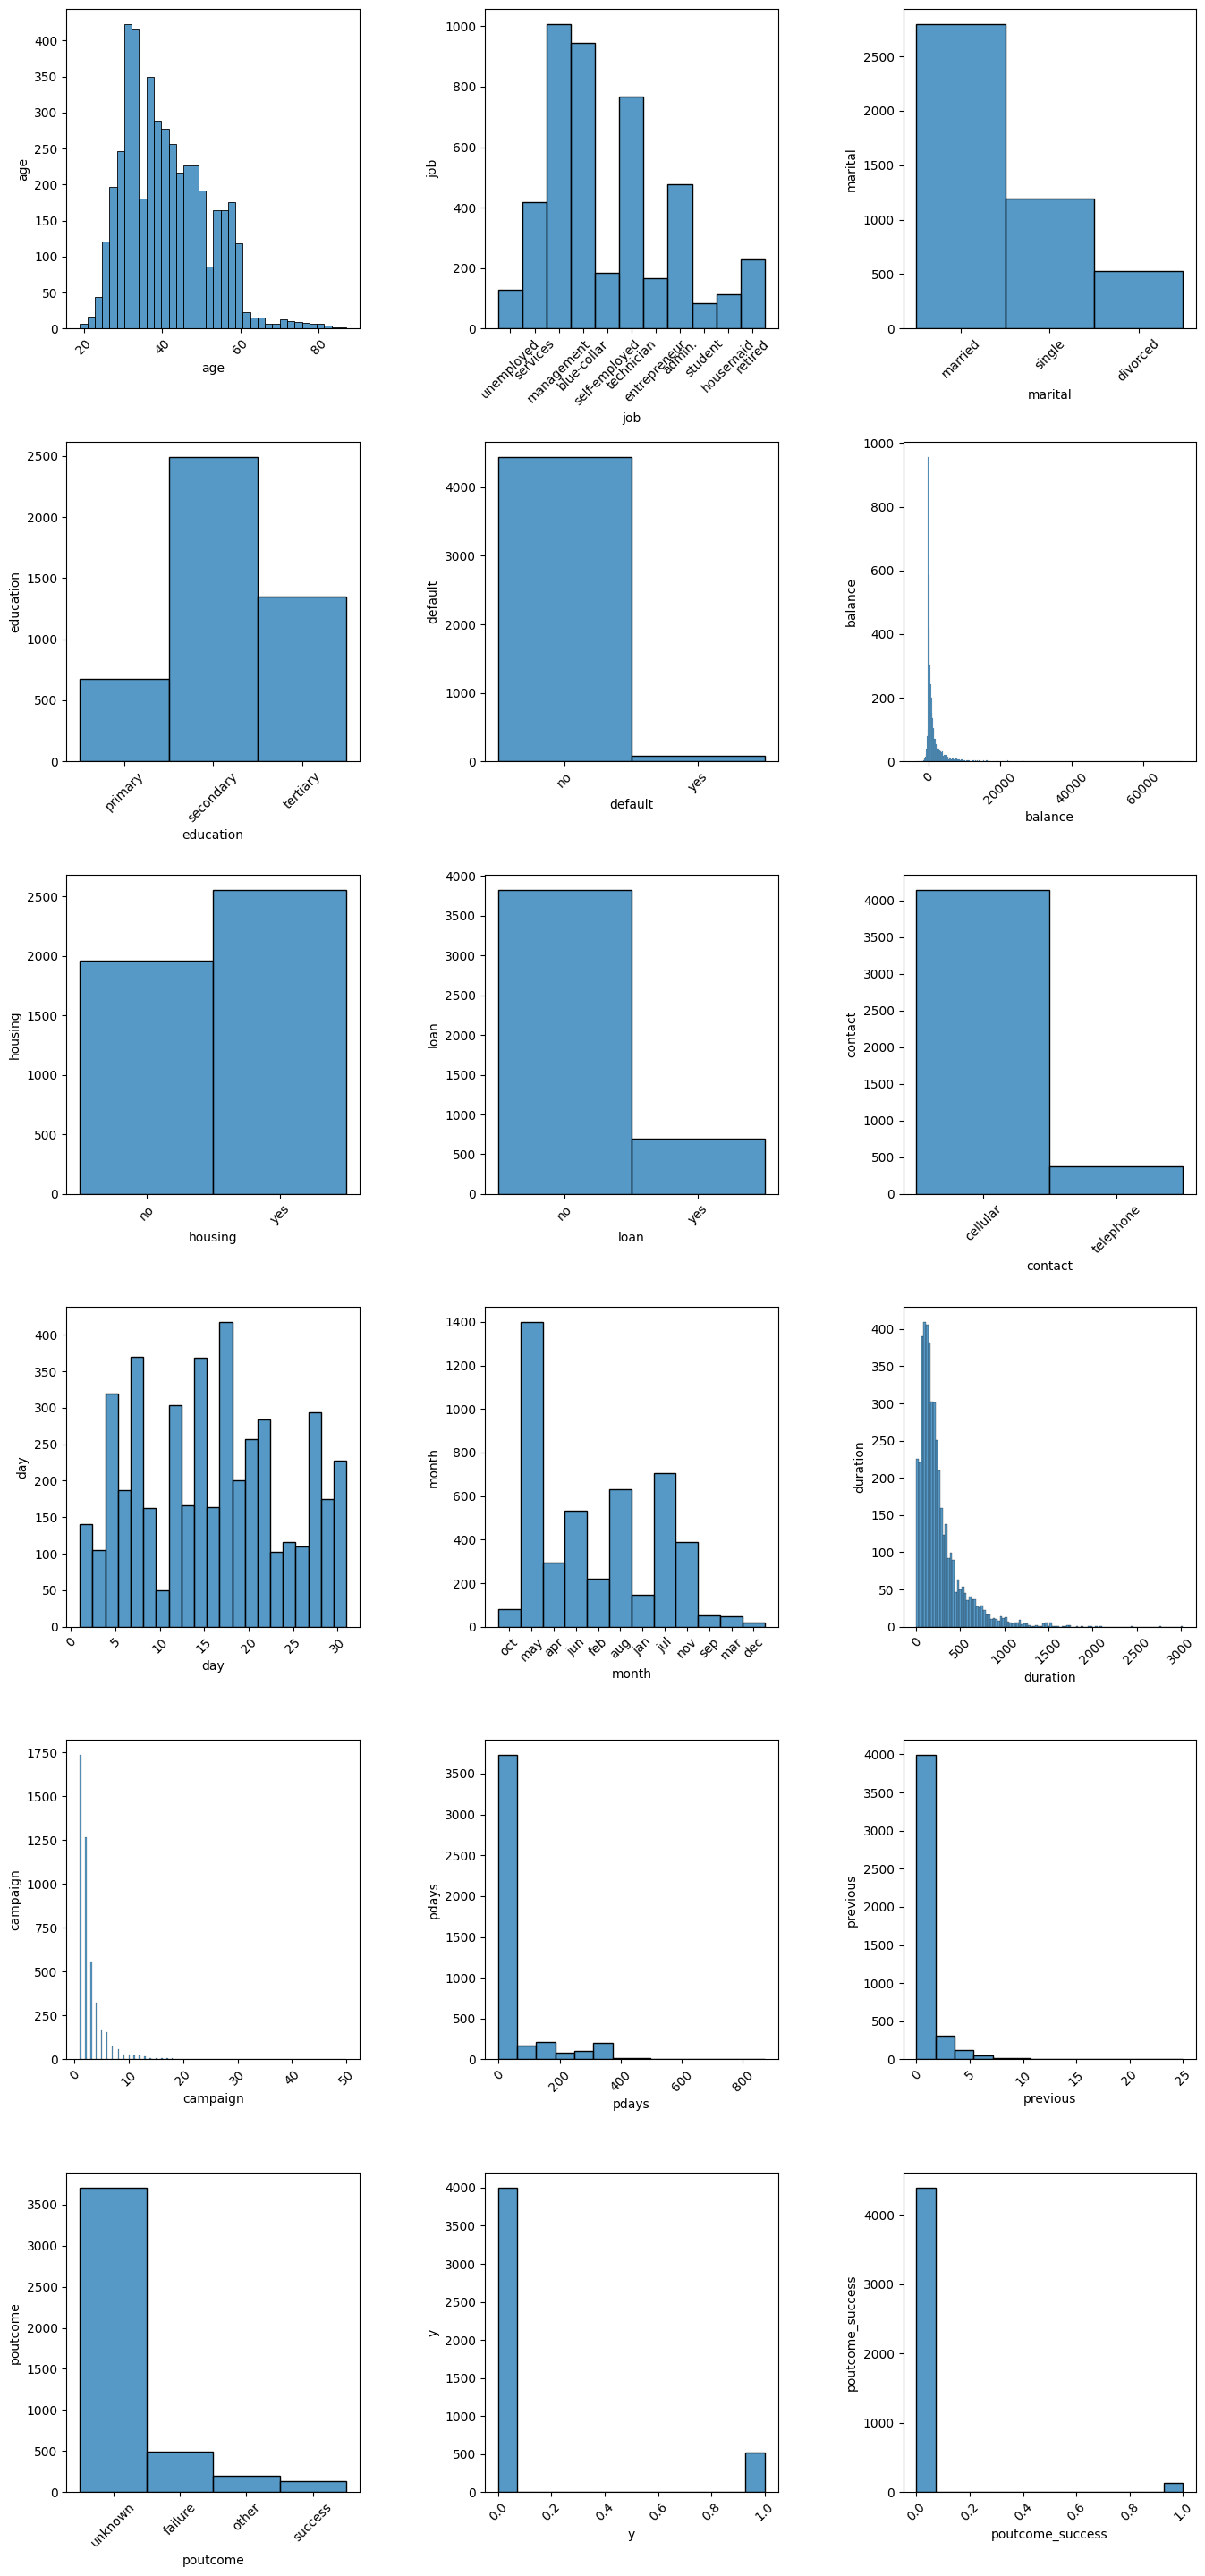

In [2512]:
columns = df_test.columns
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad= 7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df_test, x=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)
    ax.tick_params(axis='x', rotation=45)
plt.show()

I'm going to leave the remainder of the outliers. There are so many in this dataset that removing all outliers would remove far to much of the data, so we should look to use models that will handle outliers well. We can see though that in both the test and train datasets, there's lots of inbalance in the y target variable. This may cause problems for baseline models. I'll keep this in mind, as synthetic sampling may be needed.

I will do some bivariant analysis to see the relationships between the features and the target variable

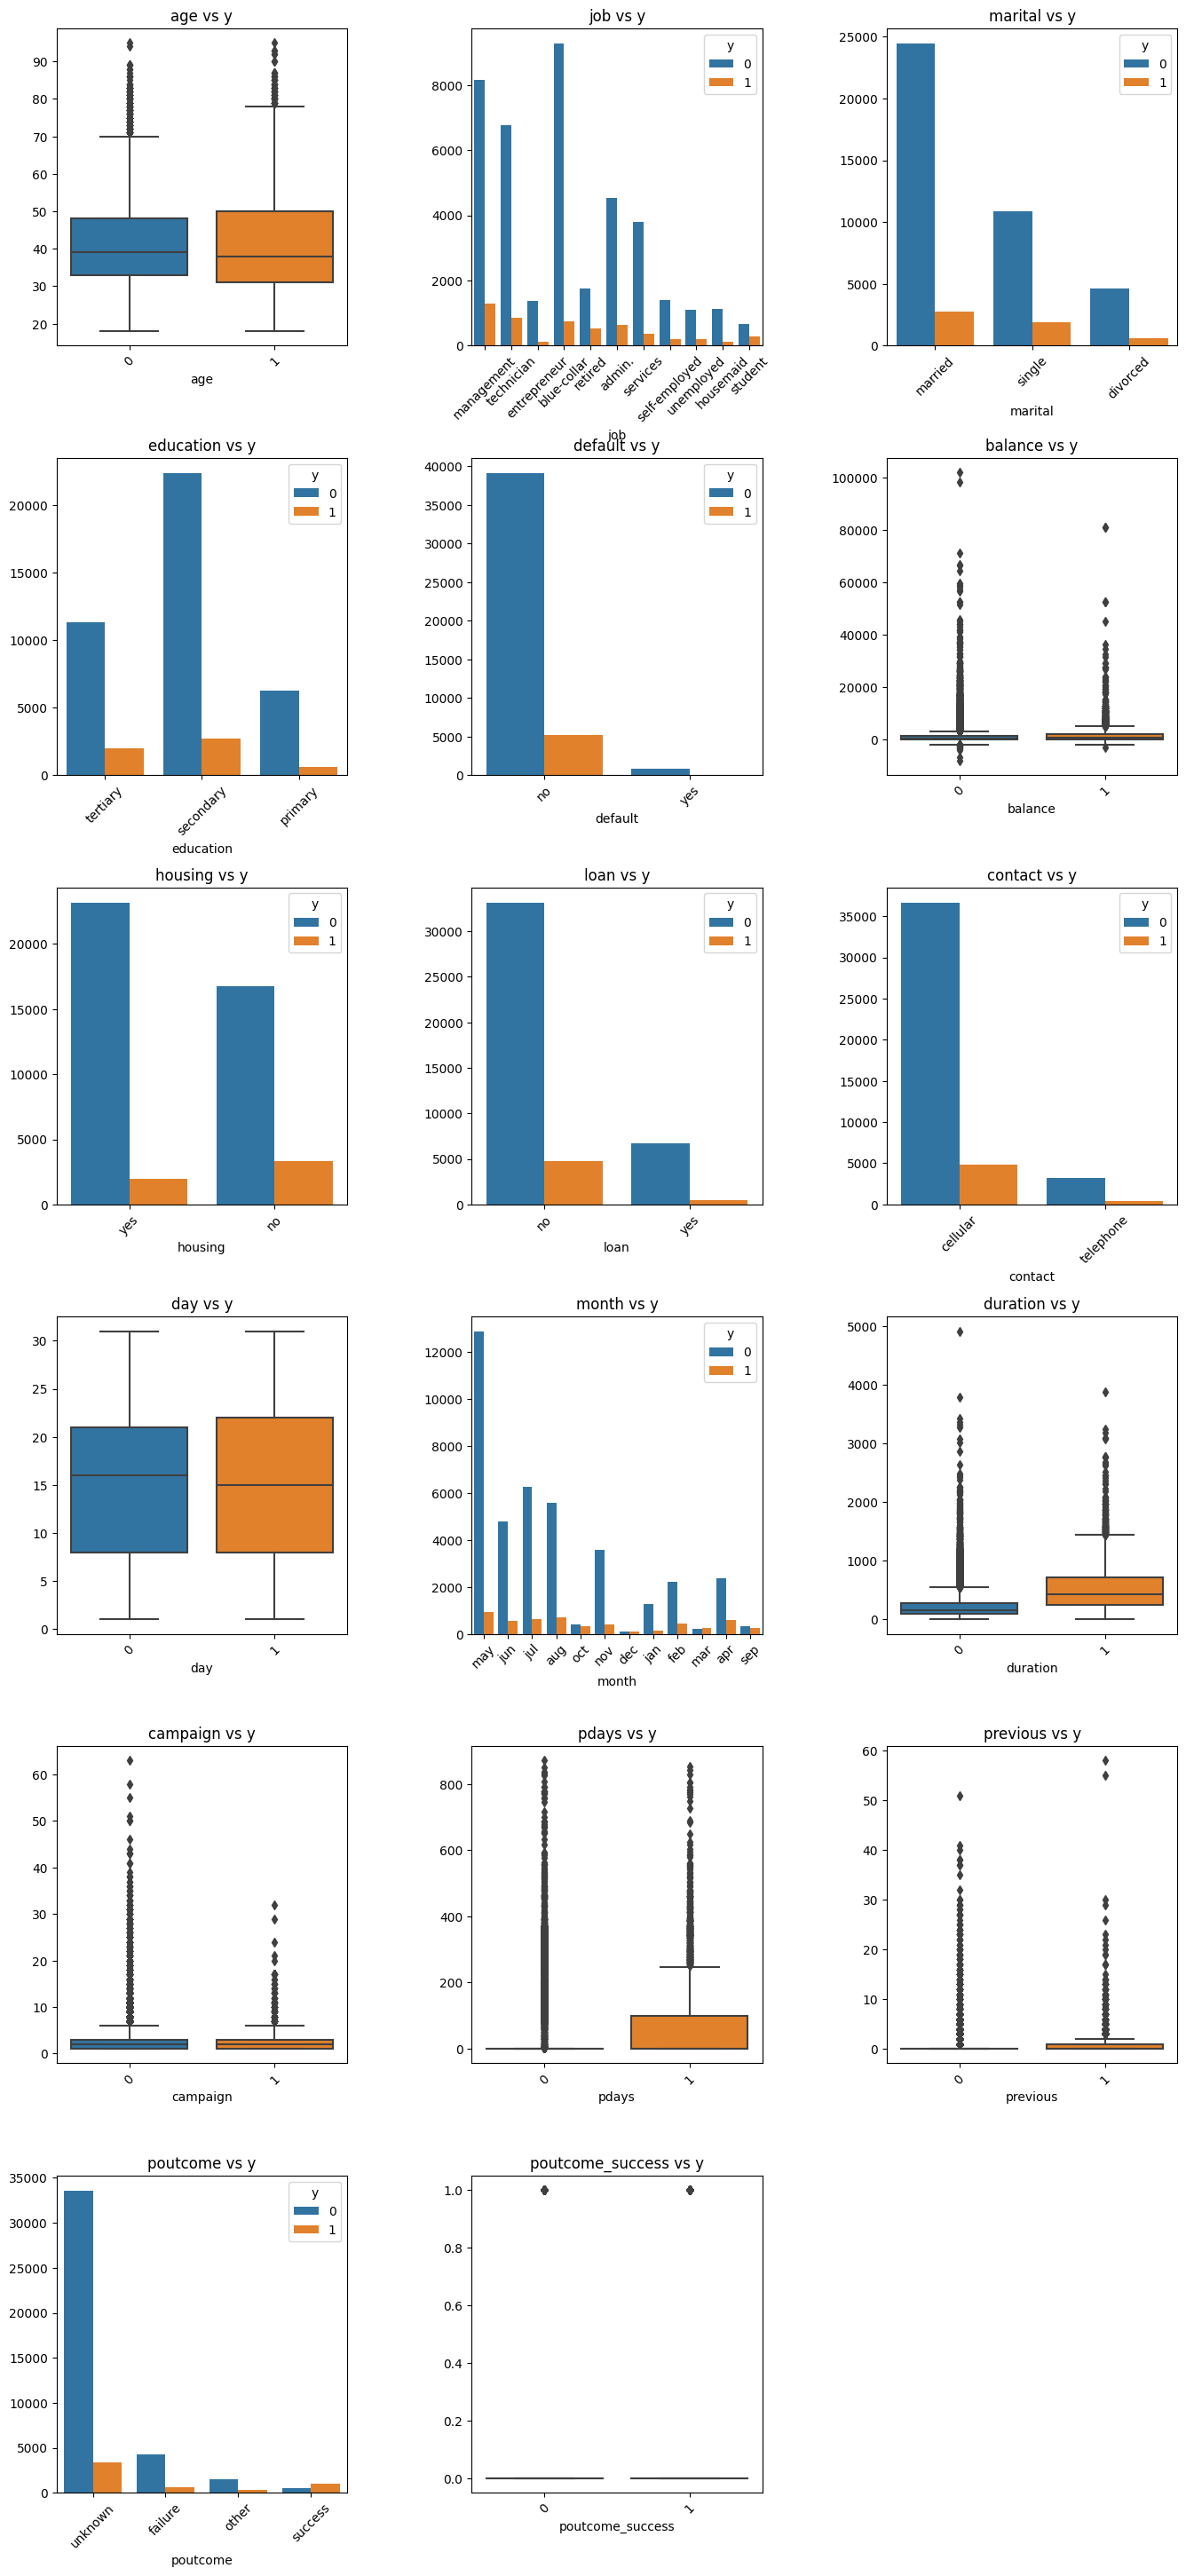

In [2513]:
columns = df_train.columns.drop('y')
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad= 7.0)

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    
    if np.issubdtype(df_train[column].dtype, np.number):
        sns.boxplot(data=df_train, y=column, x='y', ax=ax)
    else:
        sns.countplot(data=df_train, x=column, hue='y', ax=ax)
    
    ax.set_xlabel(column)
    ax.set_ylabel('')
    ax.set_title(f"{column} vs y")
    ax.tick_params(axis='x', rotation=45)

for j in range(i+1, num_rows*num_cols):
    axes.flatten()[j].set_visible(False)

plt.show()


There's a few takeaways that we can see in these graphs. People who have subscribed seem to skew a little older, job seems to matter (with retired people seeming to subscribe at a higher relative rate), marital status and education seem to have an effect (proportional analysis could help clarify this further), people who have defaulted never subscribe, people who subscribe seem to have higher balances (on average), those without housing or personal loans subscribe at a higher percentage rate than those with loans, those with the preferred contact method of cellphone vs telephone seem to sibscribe at a hgiher rate, time of year (month) definitely seems to make a huge impact, those who had longer contact times during the last call on average tended to subscribe more often. The number of contacts performed during the campaign seems to be significant as well, with customers contacted over roughly 35 times never subscribing. 

In [2514]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45210 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               45210 non-null  int64 
 1   job               45210 non-null  object
 2   marital           45210 non-null  object
 3   education         45210 non-null  object
 4   default           45210 non-null  object
 5   balance           45210 non-null  int64 
 6   housing           45210 non-null  object
 7   loan              45210 non-null  object
 8   contact           45210 non-null  object
 9   day               45210 non-null  int64 
 10  month             45210 non-null  object
 11  duration          45210 non-null  int64 
 12  campaign          45210 non-null  int64 
 13  pdays             45210 non-null  int64 
 14  previous          45210 non-null  int64 
 15  poutcome          45210 non-null  object
 16  y                 45210 non-null  int64 
 17  poutcome_suc

In [2515]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,poutcome_success
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,unknown,0,0
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,unknown,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,unknown,0,0
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,unknown,0,0
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,unknown,0,0


In [2516]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'poutcome_success'],
      dtype='object')

In [2517]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'campaign','poutcome', 'poutcome_success']
num_columns = ['balance', 'pdays', 'previous']
target = 'y'

In [2518]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)])

In [2519]:
X_train = df_train[cat_columns + num_columns]
X_test = df_test[cat_columns + num_columns]
y_train = df_train[target]
y_test = df_test[target]

In [2520]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [2521]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X =  X_train_preprocessed
y = df_train['y']

y = y.astype('int')

smote = SMOTE()
X_balance, Y_balance = smote.fit_resample(X, y)

feature_names = (preprocessor.named_transformers_['cat']
                 .get_feature_names_out(input_features=cat_columns))

all_feature_names = np.concatenate([num_columns, feature_names])

X_balance = pd.DataFrame(X_balance, columns=all_feature_names)


ValueError: Shape of passed values is (79842, 1), indices imply (79842, 125)

In [ ]:
X_balanced_df = pd.DataFrame(data=X_balance, columns=all_feature_names)


ValueError: Shape of passed values is (79842, 1), indices imply (79842, 125)

In [ ]:
results = {}

Baseline models

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4000
           1       0.71      0.13      0.23       521

    accuracy                           0.89      4521
   macro avg       0.81      0.56      0.58      4521
weighted avg       0.88      0.89      0.86      4521



In [ ]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore')

In [ ]:
warnings.simplefilter(action='ignore')


Trying Logistic Regression Model without any tuning

In [ ]:
log = LogisticRegression()
log.fit(X_train_preprocessed, y_train)
y_pred_log = log.predict(X_test_preprocessed)
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4000
           1       0.62      0.15      0.24       521

    accuracy                           0.89      4521
   macro avg       0.76      0.57      0.59      4521
weighted avg       0.87      0.89      0.86      4521



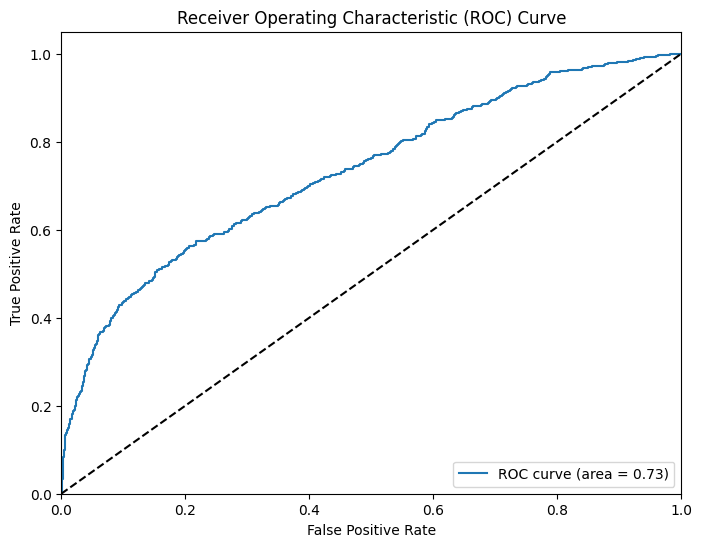

In [ ]:
y_pred_prob = log.predict_proba(X_test_preprocessed)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Trying Logistic Regression Model with tuning

In [ ]:
log_param = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [10, 50, 100, 200, 300],
    'l1_ratio': [0, 0.5, 1]
}

random_search = RandomizedSearchCV(log, param_distributions=log_param, scoring='recall', cv=5)

random_search.fit(X_train_preprocessed, y_train)
best_log_reg = random_search.best_estimator_
best_log_reg.fit(X_train_preprocessed, y_train)
y_pred_log = best_log_reg.predict(X_test_preprocessed)


print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(random_search.best_score_))
cv_scores = cross_val_score(best_log_reg, X_train_preprocessed, y_train, cv=5, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

Best parameters found:  {'solver': 'saga', 'penalty': 'none', 'max_iter': 100, 'l1_ratio': 1, 'C': 100}
Best cross-validation accuracy: 0.20
Average CV Recall Score: 20.08%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4000
           1       0.62      0.15      0.24       521

    accuracy                           0.89      4521
   macro avg       0.76      0.57      0.59      4521
weighted avg       0.87      0.89      0.86      4521



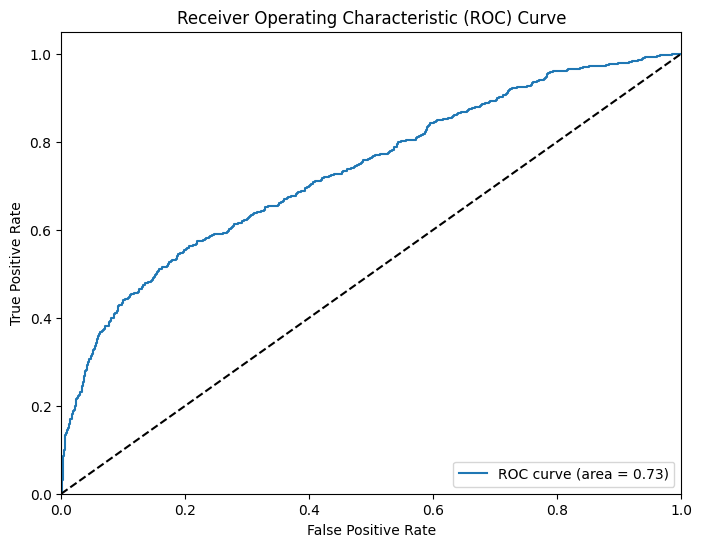

In [ ]:
y_pred_prob = best_log_reg.predict_proba(X_test_preprocessed)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_preprocessed, y_train)
y_pred_knn = knn.predict(X_test_preprocessed)

print("KNN Model Accuracy (in %):", metrics.accuracy_score(y_test, y_pred_knn) * 100)
cv_scores = cross_val_score(knn, X_train_preprocessed, y_train, cv=5, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Model Accuracy (in %): 90.13492590134926
Average CV Recall Score: 17.77%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4000
           1       0.71      0.24      0.36       521

    accuracy                           0.90      4521
   macro avg       0.81      0.62      0.65      4521
weighted avg       0.89      0.90      0.88      4521



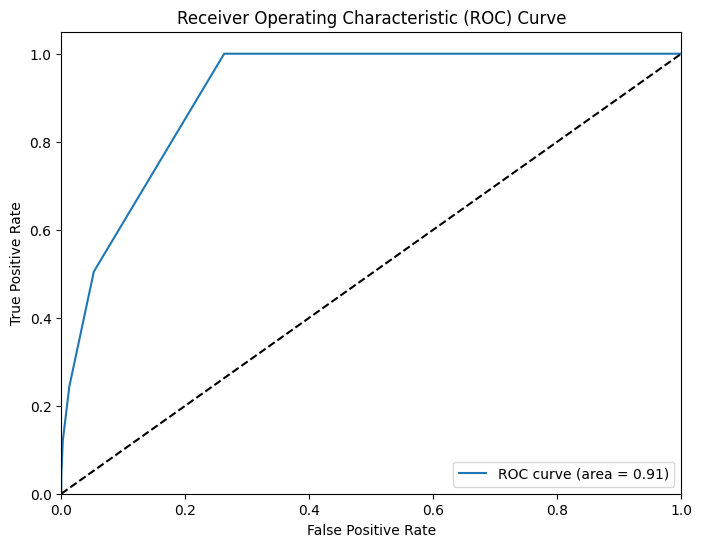

In [ ]:
y_pred_prob = knn.predict_proba(X_test_preprocessed)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
params_knn = {'n_neighbors': [3, 5, 7, 20, 30, 50]}
knn = KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(knn, params_knn, cv=5, scoring='recall')
random_search_knn.fit(X_train_preprocessed, y_train)
best_knn = random_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_knn.best_params_)
cv_scores = cross_val_score(best_knn, X_train_preprocessed, y_train, cv=5, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")
print("KNN Model Accuracy (in %):", metrics.accuracy_score(y_test, y_pred_knn) * 100)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Best parameters found:  {'n_neighbors': 3}
Average CV Recall Score: 19.62%
KNN Model Accuracy (in %): 91.19663791196638
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4000
           1       0.74      0.36      0.49       521

    accuracy                           0.91      4521
   macro avg       0.83      0.67      0.72      4521
weighted avg       0.90      0.91      0.90      4521



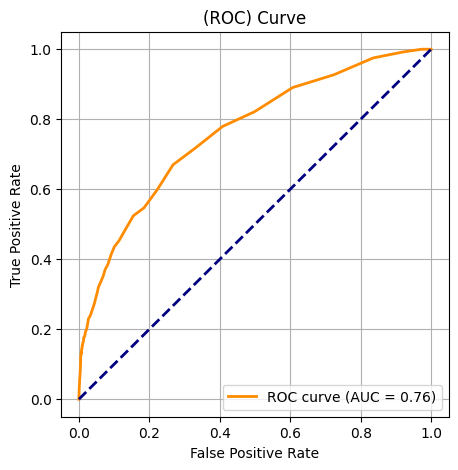

In [ ]:
y_pred_prob = best_knn.predict_proba(X_test_preprocessed)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_preprocessed, y_train)
y_pred_rf = rf.predict(X_test_preprocessed)


cv_scores = cross_val_score(rf, X_train_preprocessed, y_train, cv=5, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")

print("Random Forest Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred_forest) * 100)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Average CV Recall Score: 18.90%
Random Forest Model Accuracy (in %): 99.80092899800928
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      0.99      0.99       521

    accuracy                           1.00      4521
   macro avg       1.00      0.99      1.00      4521
weighted avg       1.00      1.00      1.00      4521



In [ ]:
rf_param = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30, 50]}

random_search_rf = RandomizedSearchCV(rf, param_distributions=rf_param, cv=5, scoring= 'recall')

random_search_rf.fit(X_train_preprocessed, y_train)
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_rf.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(random_search_rf.best_score_))
cv_scores = cross_val_score(best_rf, X_train_preprocessed, y_train, cv=5, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Best parameters found:  {'n_estimators': 50, 'max_depth': 50}
Best cross-validation accuracy: 0.19
Average CV Recall Score: 18.71%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      0.97      0.98       521

    accuracy                           1.00      4521
   macro avg       1.00      0.98      0.99      4521
weighted avg       1.00      1.00      1.00      4521



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [ ]:
ada_params = {'n_estimators': [25, 50, 75], 'learning_rate': [0.01, 0.1, 0.5, 1]}

adaboost = AdaBoostClassifier()

random_search_adaboost = RandomizedSearchCV(adaboost, param_distributions=ada_params, cv=5, scoring='recall')

random_search_adaboost.fit(X_train_preprocessed, y_train)
best_adaboost = random_search_adaboost.best_estimator_
y_pred_ada = best_adaboost.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_adaboost.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(random_search_adaboost.best_score_))
cv_scores = cross_val_score(best_adaboost, X_train_preprocessed, y_train, cv=5, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")
print("AdaBoost Model Accuracy (in %):", metrics.accuracy_score(y_test, y_pred_ada) * 100)
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))

Best parameters found:  {'n_estimators': 75, 'learning_rate': 1}
Best cross-validation accuracy: 0.21
Average CV Recall Score: 21.21%
AdaBoost Model Accuracy (in %): 89.00685689006856
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4000
           1       0.59      0.15      0.24       521

    accuracy                           0.89      4521
   macro avg       0.74      0.57      0.59      4521
weighted avg       0.86      0.89      0.86      4521



In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error

In [ ]:
bag_params = {'n_estimators': [5, 10, 20, 40], 'max_samples': [0.5, 0.8, 1.0], 'max_features': [0.5, 0.8, 1.0]}

bagging_classifier = BaggingClassifier()

random_search_bagging = RandomizedSearchCV(bagging_classifier, param_distributions=bag_params, cv=5, scoring= 'recall')

random_search_bagging.fit(X_train_preprocessed, y_train)

best_bagging = random_search_bagging.best_estimator_

y_pred_bag = best_bagging.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_bagging.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(random_search_bagging.best_score_))
cv_scores = cross_val_score(best_bagging, X_train_preprocessed, y_train, cv=5, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall Score: {mean_cv_score * 100:.2f}%")
print("Bagging Model Accuracy (in %):", metrics.accuracy_score(y_test, y_pred_bag) * 100)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bag))


Best parameters found:  {'n_estimators': 5, 'max_samples': 0.8, 'max_features': 0.8}
Best cross-validation accuracy: 0.21
Average CV Recall Score: 19.75%
Bagging Model Accuracy (in %): 95.44348595443486

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4000
           1       0.94      0.65      0.77       521

    accuracy                           0.95      4521
   macro avg       0.95      0.82      0.87      4521
weighted avg       0.95      0.95      0.95      4521



In [ ]:
vote_params = {'voting': ['hard', 'soft']}

voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

random_search_vote = RandomizedSearchCV(voting, param_distributions=vote_params, cv=5, scoring='recall')
random_search_vote.fit(X_train_preprocessed, y_train)
best_vote = random_search_vote.best_estimator_
y_pred_vote = best_vote.predict(X_test_preprocessed)


print("Best parameters found: ", random_search_vote.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(random_search_vote.best_score_))
cv_scores = cross_val_score(best_vote, X_train_preprocessed, y_train, cv=5, scoring='recall')
mean_cv_score = np.mean(cv_scores)
print(f"Average CV Recall score: {mean_cv_score * 100:.2f}%")
print("Voting Model Accuracy (in %):", metrics.accuracy_score(y_test, y_pred_vote) * 100)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_vote))

Best parameters found:  {'voting': 'hard'}
Best cross-validation accuracy: 0.19
Average CV Recall score: 18.88%
Voting Model Accuracy (in %): 91.06392391063925

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4000
           1       0.87      0.26      0.40       521

    accuracy                           0.91      4521
   macro avg       0.89      0.63      0.68      4521
weighted avg       0.91      0.91      0.89      4521

